In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
states = [1,2,3,4,5,6,7,8,9]
actions = ['droite', 'haut','gauche','bas']

In [3]:
def transition_matrix(u):
    if u == 'gauche':
        mini = np.array([[1,0,0],[1,0,0],[0,1,0]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
    
    if u == 'droite':
        mini = np.array([[0,1,0],[0,0,1],[0,0,1]])
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [zeros_block,mini, zeros_block],[zeros_block,zeros_block,mini]])
        
    if u == 'haut':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[mini, zeros_block, zeros_block], [mini, zeros_block, zeros_block],[zeros_block,mini,zeros_block]])
        
    if u == 'bas':
        mini = np.eye(3)
        zeros_block = np.array([[0,0,0],[0,0,0],[0,0,0]])
        tr = np.block([[zeros_block, mini, zeros_block], [zeros_block, zeros_block, mini],[zeros_block,zeros_block, mini]])    
    return tr

In [4]:
def transition(s, u):
    tr = transition_matrix(u)
    ligne = tr[s - 1]
    return np.random.choice(states, size=1, replace=True, p=ligne)[0]

In [5]:
def reward(s, u):
#     if ((s == 2) and (u=='droite')) or (s==3) or ((s==6) and (u=='haut')):
#         return(10)
#     elif ((s==4)) or ((s==1) and (u=='bas')) or ((s==5) and (u=='gauche')) or ((s==7) and (u == 'haut')):
#         return(-10)
    if s==3:
        return 10
    elif s==4:
        return -10
    else:
        return 0

In [6]:
def  env_step(s, u):
    next_state = transition(s,u)
    rew = reward(s, u)
    done = ((s == 3) or (next_state == 3))
    return next_state, rew, done

# Q-learning algorithm

In [20]:
q_table = np.zeros([len(states),len(actions)])

In [21]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

In [22]:
for i in range(10000):
    s = np.random.randint(1,len(states)+1) #initial state
    state_index = s-1
    
    epochs, penalties, rew = 0, 0, 0
    done = False
    
    for j in range(3):
        if np.random.uniform(0, 1) < epsilon:
            action_index = np.random.randint(0,len(actions)) # Explore action space
        else:
            action_index = np.argmax(q_table[state_index]) # Exploit learned values

        u = actions[action_index]

        next_state, rew, done = env_step(s, u)
        next_state_index = next_state - 1
        
        old_value = q_table[state_index, action_index]
        next_max = np.max(q_table[next_state_index])

        new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
        q_table[state_index, action_index] = new_value

        if rew == -10:
            penalties += 1

        s = next_state
        state_index = s-1

        epochs += 1

print("Training finished.\n")

Training finished.



In [23]:
print(actions)
print(q_table)

['droite', 'haut', 'gauche', 'bas']
[[  9.           5.13021883   5.27834663  -2.56346353]
 [ 15.           8.96426202   5.38786712   5.39292239]
 [ 25.          25.          19.          19.        ]
 [ -4.6         -4.62346401 -12.37664564  -7.84383973]
 [  9.           8.99994521  -2.75999555   3.2399982 ]
 [  8.99996342  15.           5.3999932    5.39997413]
 [  3.24        -2.66670048   1.84305153   1.70427902]
 [  5.33260684   5.4          1.94277225   3.23749343]
 [  5.0931223    9.           3.24         4.08436371]]


## Computing optimal values using dynamic programming algorithm


In [11]:
q_dp = np.zeros([len(states),len(actions)])
q_dp[2]=10
q_dp[3]=-10


In [12]:
for t in range(100, 0,-1):
    q_dp_new = q_dp.copy()
    for i in range(len(states)):
        for j in range(len(actions)):
            u = actions[j]
            s = states[i]
            trmat = transition_matrix(u)
            ligne_i = trmat[i]
            q_max = np.max(q_dp, axis = 1)
            q_dp_new[i][j] = reward(s,u) + gamma*np.dot(q_max, ligne_i)
    q_dp = q_dp_new

In [13]:
print(actions)
q_dp

['droite', 'haut', 'gauche', 'bas']


array([[  9.   ,   5.4  ,   5.4  ,  -2.76 ],
       [ 15.   ,   9.   ,   5.4  ,   5.4  ],
       [ 25.   ,  25.   ,  19.   ,  19.   ],
       [ -4.6  ,  -4.6  , -12.76 ,  -8.056],
       [  9.   ,   9.   ,  -2.76 ,   3.24 ],
       [  9.   ,  15.   ,   5.4  ,   5.4  ],
       [  3.24 ,  -2.76 ,   1.944,   1.944],
       [  5.4  ,   5.4  ,   1.944,   3.24 ],
       [  5.4  ,   9.   ,   3.24 ,   5.4  ]])

In [14]:
#error
(np.mean((q_table-q_dp)**2))**0.5

0.09764280334203866

## Comparing number of iterations vs error

In [52]:
time_steps = np.logspace(1, 5, 10, endpoint=True).astype(int)
error = np.zeros(len(time_steps))

In [53]:
for k in range(len(time_steps)):
    print(k)
    time = time_steps[k]
    q_table = np.zeros([len(states),len(actions)])
    for i in range(time):
        s = np.random.randint(1,len(states)+1) #initial state
        state_index = s-1

        epochs, penalties, rew = 0, 0, 0
        done = False

        for j in range(3):
            if np.random.uniform(0, 1) < epsilon:
                action_index = np.random.randint(0,len(actions)) # Explore action space
            else:
                action_index = np.argmax(q_table[state_index]) # Exploit learned values

            u = actions[action_index]

            next_state, rew, done = env_step(s, u)
            next_state_index = next_state - 1

            old_value = q_table[state_index, action_index]
            next_max = np.max(q_table[next_state_index])

            new_value = (1 - alpha) * old_value + alpha * (rew + gamma * next_max)
            q_table[state_index, action_index] = new_value

            if rew == -10:
                penalties += 1

            s = next_state
            state_index = s-1

            epochs += 1
            
    error[k] = (np.mean((q_table-q_dp)**2))**0.5

0
1
2
3
4
5
6
7
8
9


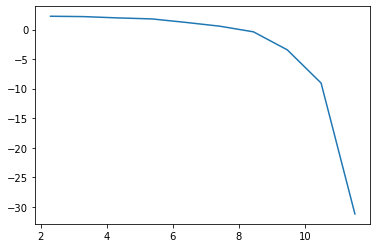

In [59]:
plt.plot(np.log(time_steps), np.log(error))

In [57]:
error

array([9.41956689e+00, 8.86593115e+00, 7.10879863e+00, 5.98841716e+00,
       3.32603052e+00, 1.75603887e+00, 6.74837569e-01, 3.21343374e-02,
       1.16732675e-04, 2.85438174e-14])

In [50]:
time_steps[6]

21544

In [43]:
np.logspace(1, 6, 10, endpoint=True).astype(int)

array([     10,      35,     129,     464,    1668,    5994,   21544,
         77426,  278255, 1000000])